In [100]:
# Print python tokenization in detail

import tokenize
import io
import pandas as pd

def tokenize_and_print(code):
    try:
        indent_level = 0
        tokens = tokenize.tokenize(io.BytesIO(code.encode('utf-8')).readline)
        for index, token in enumerate(tokens):
            if index < 1000:
                if token.type == tokenize.NL:
                    indent_level = 0
                elif token.type == tokenize.INDENT:
                    indent_level += 1
                elif token.type == tokenize.DEDENT:
                    indent_level -= 1
            
                print(indent_level, token)
    except tokenize.TokenError:
        print("Tokenization error")

def main():
    filepath = r"C:\Program Files\Coding Programs\GitHub\LLM-Code-Bot\Training_Data\LeetCode_Master\raw_data.csv"
    df = pd.read_csv(filepath)
    target_code = df['targets'].head(3)
    
    for code in target_code:
        tokenize_and_print(code)

if __name__ == '__main__':
    main()


0 TokenInfo(type=63 (ENCODING), string='utf-8', start=(0, 0), end=(0, 0), line='')
0 TokenInfo(type=1 (NAME), string='import', start=(1, 0), end=(1, 6), line='import unittest\n')
0 TokenInfo(type=1 (NAME), string='unittest', start=(1, 7), end=(1, 15), line='import unittest\n')
0 TokenInfo(type=4 (NEWLINE), string='\n', start=(1, 15), end=(1, 16), line='import unittest\n')
0 TokenInfo(type=62 (NL), string='\n', start=(2, 0), end=(2, 1), line='\n')
0 TokenInfo(type=62 (NL), string='\n', start=(3, 0), end=(3, 1), line='\n')
0 TokenInfo(type=1 (NAME), string='class', start=(4, 0), end=(4, 5), line='class Solution(object):\n')
0 TokenInfo(type=1 (NAME), string='Solution', start=(4, 6), end=(4, 14), line='class Solution(object):\n')
0 TokenInfo(type=54 (OP), string='(', start=(4, 14), end=(4, 15), line='class Solution(object):\n')
0 TokenInfo(type=1 (NAME), string='object', start=(4, 15), end=(4, 21), line='class Solution(object):\n')
0 TokenInfo(type=54 (OP), string=')', start=(4, 21), end=

In [ ]:
# Raw untokenized code visualization

import pandas as pd
from pygments import highlight
from pygments.lexers import PythonLexer
from pygments.formatters import HtmlFormatter

# Load code examples
filepath = r"C:\Program Files\Coding Programs\GitHub\LLM-Code-Bot\Training_Data\LeetCode_Master\raw_data.csv"
df = pd.read_csv(filepath)
targets = df['targets'].head(2)

# Highlight code for each example
formatter = HtmlFormatter(full=True, style='colorful')
html_content = ""
for target in targets:
    highlighted_code = highlight(target, PythonLexer(), formatter)
    display(HTML(highlighted_code))
    
    html_content += highlighted_code + "<br><hr><br>"

# Save colored code to an HTML file
output_html = 'highlighted_code.html'
with open(output_html, 'w') as html_file:
    html_file.write(html_content)


In [113]:
# Compare raw python tokenization to keras tokenization to make sure it stays true

import tokenize
import io
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer # type: ignore

def tokenize_with_python(code):
    tokens = []
    try:
        token_generator = tokenize.tokenize(io.BytesIO(code.encode('utf-8')).readline)
        for token in token_generator:
            if token.type != tokenize.ENCODING:
                if token.type == tokenize.STRING:
                    if token.string.startswith('"""') or token.string.startswith("'''"):
                        continue
                elif token.type == tokenize.INDENT:
                    tokens.append('<INDENT>')
                elif token.type == tokenize.DEDENT:
                    tokens.append('<DEDENT>')
                else:
                    tokens.append(token.string)
        
        while tokens[-1] in ('', '<INDENT>', '<DEDENT>'):
            tokens.pop()
    except tokenize.TokenError:
        print("Tokenization error")
    return tokens

def fit_and_tokenize_with_keras(pre_tokenized_texts, special_tokens):
    tokenizer = Tokenizer(filters='', oov_token='UNK', lower=False)
    tokenizer.fit_on_texts(special_tokens + pre_tokenized_texts)
    sequences = tokenizer.texts_to_sequences(pre_tokenized_texts)
    reverse_word_index = {index: word for word, index in tokenizer.word_index.items()}
    keras_tokens = []
    for seq in sequences[0]:
        keras_tokens.append(reverse_word_index.get(seq, 'UNK'))
    return keras_tokens

def compare_tokenizations(python_tokens, keras_tokens):
    for python_token, keras_token in zip(python_tokens, keras_tokens):
        print(f"Python: {python_token} | Keras: {keras_token}")
        if python_token != keras_token:
            print(f"Discrepancy found at token: {python_token} vs {keras_token}")
            print("Error token found")
            return False
    return True

def main():
    filepath = r"C:\Program Files\Coding Programs\GitHub\LLM-Code-Bot\Training_Data\LeetCode_Master\raw_data.csv"
    df = pd.read_csv(filepath)
    target_code = df['targets'].head(3)

    # Define special tokens
    special_tokens = ['<INDENT>', '<DEDENT>', '\n', ' ' * 4]

    for code in target_code:
        python_tokens = tokenize_with_python(code)
        pre_tokenized_text = ' '.join(python_tokens)
        keras_tokens = fit_and_tokenize_with_keras([pre_tokenized_text], special_tokens)

        if not compare_tokenizations(python_tokens, keras_tokens):
            break

if __name__ == '__main__':
    main()


Python: import | Keras: import
Python: unittest | Keras: unittest
Python: 
 | Keras: 

Python: 
 | Keras: 

Python: 
 | Keras: 

Python: class | Keras: class
Python: Solution | Keras: Solution
Python: ( | Keras: (
Python: object | Keras: object
Python: ) | Keras: )
Python: : | Keras: :
Python: 
 | Keras: 

Python: <INDENT> | Keras: <INDENT>
Python: def | Keras: def
Python: threeSum | Keras: threeSum
Python: ( | Keras: (
Python: self | Keras: self
Python: , | Keras: ,
Python: nums | Keras: nums
Python: ) | Keras: )
Python: : | Keras: :
Python: 
 | Keras: 

Python: <INDENT> | Keras: <INDENT>
Python: 
 | Keras: 

Python: lst | Keras: lst
Python: = | Keras: =
Python: [ | Keras: [
Python: ] | Keras: ]
Python: 
 | Keras: 

Python: nums | Keras: nums
Python: . | Keras: .
Python: sort | Keras: sort
Python: ( | Keras: (
Python: ) | Keras: )
Python: 
 | Keras: 

Python: for | Keras: for
Python: i | Keras: i
Python: in | Keras: in
Python: xrange | Keras: xrange
Python: ( | Keras: (
Python: len | 

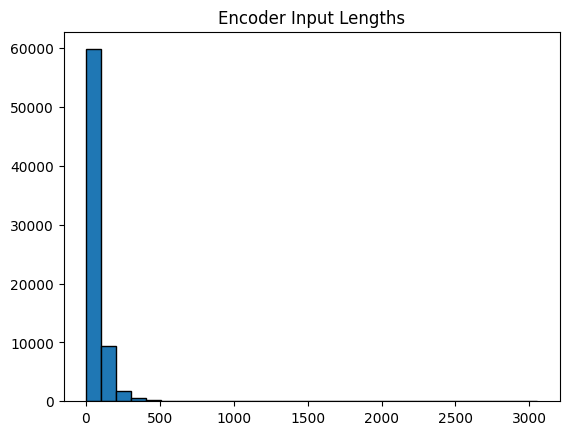

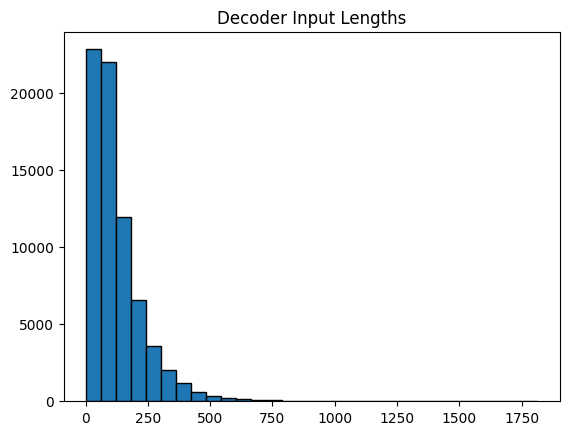

Top 10 Encoder Input Lengths:
Index: 366, Length: 3052
Index: 278, Length: 2227
Index: 353, Length: 2148
Index: 191, Length: 2126
Index: 175, Length: 1941
Index: 215, Length: 1918
Index: 14222, Length: 1824
Index: 219, Length: 1766
Index: 23384, Length: 1709
Index: 21106, Length: 1694

Top 10 Decoder Input Lengths:
Index: 220, Length: 1812
Index: 175, Length: 1763
Index: 174, Length: 1649
Index: 191, Length: 1618
Index: 190, Length: 1540
Index: 327, Length: 1480
Index: 63604, Length: 1449
Index: 392, Length: 1417
Index: 328, Length: 1396
Index: 408, Length: 1392


In [118]:
# Check for unreasonably long encoder_inputs and decoder_inputs

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def load_data(npz_path):
    data = np.load(npz_path)
    encoder_inputs = data['encoder_inputs']
    decoder_inputs = data['decoder_inputs']
    return encoder_inputs, decoder_inputs

def plot_histogram(lengths, title):
    plt.hist(lengths, bins=30, edgecolor='black')
    plt.title(title)
    plt.show()

def get_top_indices(lengths, top_n=10):
    length_indices = [(length, idx) for idx, length in enumerate(lengths)]
    length_indices.sort(reverse=True, key=lambda x: x[0])
    return length_indices[:top_n]

def main():
    npz_path = r"C:\Program Files\Coding Programs\GitHub\LLM-Code-Bot\Training_Data\All\tokenized_padded_data.npz"
    encoder_inputs, decoder_inputs = load_data(npz_path)

    # Make histograms
    encoder_lengths = [np.count_nonzero(seq) for seq in encoder_inputs]
    decoder_lengths = [np.count_nonzero(seq) for seq in decoder_inputs]

    plot_histogram(encoder_lengths, 'Encoder Input Lengths')
    plot_histogram(decoder_lengths, 'Decoder Input Lengths')

    # Get the highest indices
    encoder_top_indices = get_top_indices(encoder_lengths)
    decoder_top_indices = get_top_indices(decoder_lengths)
    
    print("Top 10 Encoder Input Lengths:")
    for length, idx in encoder_top_indices:
        print(f"Index: {idx}, Length: {length}")

    print("\nTop 10 Decoder Input Lengths:")
    for length, idx in decoder_top_indices:
        print(f"Index: {idx}, Length: {length}")

if __name__ == "__main__":
    main()
